## Load the dataset

In [119]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
data = pd.read_csv("../data/dataset.csv")

In [121]:
# lets take a look at the first five rows
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [122]:
data.shape #check the number of rows and columns 

(1177, 51)

In [123]:
# lets take a look at the column list 
data.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [124]:
from sklearn.preprocessing import StandardScaler

def wrangle(df):
    # Reduce the number of columns for practice
    df = df[['age', 'BMI', 'atrialfibrillation', 'Systolic blood pressure', 'Diastolic blood pressure', 'diabetes',
             'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'PT', 'INR', 'Anion gap', 'PCO2', 'PH', 'Bicarbonate',
             'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'outcome']]
    
    # Drop columns with multicollinearity
    df.drop(columns=['Anion gap', 'Creatinine', 'PT', 'PCO2'], inplace=True)
    
    # Create a new feature 'Hypertensive'
    df['Hypertensive'] = (df['Systolic blood pressure'] >= 140) | (df['Diastolic blood pressure'] >= 90)
    
    # Drop 'Hypertensive' due to high correlation with Systolic BP
    df.drop(columns=['Hypertensive'], inplace=True)
    
    # Interaction feature
    df['MAP'] = (df['Systolic blood pressure'] + 2 * df['Diastolic blood pressure']) / 3
    df['age_BMI'] = df['age'] * df['BMI']
    
    # Polynomial features
    df['age_squared'] = df['age'] ** 2
    df['BMI_sqrt'] = np.sqrt(df['BMI'])
    
    # Categorical binning
    age_bins = [0, 30, 60, 100]
    age_labels = ['young', 'middle-aged', 'elderly']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
    
    bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
    bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
    df['BMI_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
    
    # Log transformations
    df['NT-proBNP_log'] = np.log1p(df['NT-proBNP'])
    df['Creatine kinase_log'] = np.log1p(df['Creatine kinase'])
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['atrialfibrillation', 'diabetes', 'age_group', 'BMI_category'], drop_first=True)
    
    # Scaling
    scaler = StandardScaler()
    df[['age', 'BMI', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'INR', 'PH', 'Bicarbonate', 'NT-proBNP', 'Creatine kinase', 'Urea nitrogen']] = scaler.fit_transform(df[['age', 'BMI', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'INR', 'PH', 'Bicarbonate', 'NT-proBNP', 'Creatine kinase', 'Urea nitrogen']])
    
    return df

In [125]:
df = wrangle(data)

C:\Users\oluwa\AppData\Local\Temp\ipykernel_7160\971365272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Anion gap', 'Creatinine', 'PT', 'PCO2'], inplace=True)
C:\Users\oluwa\AppData\Local\Temp\ipykernel_7160\971365272.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hypertensive'] = (df['Systolic blood pressure'] >= 140) | (df['Diastolic blood pressure'] >= 90)
C:\Users\oluwa\AppData\Local\Temp\ipykernel_7160\971365272.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [126]:
df.nunique()

age                           68
BMI                          933
Systolic blood pressure     1102
Diastolic blood pressure    1077
Respiratory rate            1004
temperature                  775
SP O2                        866
Urine output                 810
INR                          425
PH                           413
Bicarbonate                  657
NT-proBNP                   1147
Creatine kinase              691
Urea nitrogen                925
outcome                        2
MAP                         1147
age_BMI                      962
age_squared                   68
BMI_sqrt                     933
NT-proBNP_log               1147
Creatine kinase_log          691
atrialfibrillation_1           2
diabetes_1                     2
age_group_middle-aged          2
age_group_elderly              2
BMI_category_normal            2
BMI_category_overweight        2
BMI_category_obese             2
dtype: int64

In [127]:
#check the descriptive statistics
df.describe()

,age,BMI,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,INR,PH,...,NT-proBNP,Creatine kinase,Urea nitrogen,outcome,MAP,age_BMI,age_squared,BMI_sqrt,NT-proBNP_log,Creatine kinase_log
count,1177.000000,9.620000e+02,1.161000e+03,1.161000e+03,1.164000e+03,1.158000e+03,1.164000e+03,1.141000e+03,1157.000000,8.850000e+02,...,1.177000e+03,1.012000e+03,1.177000e+03,1176.000000,1161.000000,962.000000,1177.000000,962.000000,1177.000000,1012.000000
mean,0.000000,5.170269e-17,4.100462e-16,-1.224018e-16,1.495558e-16,4.945574e-15,-4.028851e-16,-1.556842e-17,0.000000,2.729769e-16,...,6.338741e-17,-3.510587e-18,5.131362e-17,0.135204,79.021343,2177.429352,5664.497026,5.439579,8.595123,4.603595
std,1.000425,1.000520e+00,1.000431e+00,1.000431e+00,1.000430e+00,1.000432e+00,1.000430e+00,1.000439e+00,1.000432,1.000565e+00,...,1.000425e+00,1.000494e+00,1.000425e+00,0.342087,10.790344,583.977452,1849.472502,0.774519,1.313695,1.074967
min,-4.099924,-1.806803e+00,-2.476653e+00,-3.258183e+00,-2.415130e+00,-5.643518e+00,-8.862040e+00,-1.493370e+00,-0.904470,-4.288376e+00,...,-8.342133e-01,-1.609248e-01,-1.416579e+00,0.000000,51.159420,565.990420,361.000000,3.653327,3.931826,2.197225
25%,-0.674336,-6.288728e-01,-7.260156e-01,-6.891882e-01,-7.187266e-01,-6.442344e-01,-5.541543e-01,-7.228119e-01,-0.582317,-6.527222e-01,...,-6.667488e-01,-1.353147e-01,-7.080352e-01,0.000000,71.369369,1809.222138,4225.000000,4.932186,7.719574,3.850148
50%,0.219295,-2.012417e-01,-1.075354e-01,-1.004635e-01,-1.072670e-01,-4.362248e-02,7.808931e-02,-1.763449e-01,-0.390397,2.181740e-02,...,-3.936773e-01,-1.061663e-01,-2.578376e-01,0.000000,77.301587,2120.121518,5929.000000,5.320947,8.672657,4.502580
75%,0.815050,3.696144e-01,6.123203e-01,5.552196e-01,6.472170e-01,5.676060e-01,7.159726e-01,4.723390e-01,0.133023,7.649542e-01,...,3.008328e-01,-4.150924e-02,4.098283e-01,0.000000,85.183908,2508.215593,7225.000000,5.799440,9.613737,5.226753
max,1.857620,8.022840e+00,4.896561e+00,4.444303e+00,5.023031e+00,4.042827e+00,1.622584e+00,5.441651e+00,8.057541,2.994365e+00,...,8.210700e+00,2.880512e+01,5.743525e+00,1.000000,129.010417,4897.959183,9801.000000,10.245505,11.686282,10.668688


In [128]:
#check the data type of each column and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1177 non-null   float64
 1   BMI                       962 non-null    float64
 2   Systolic blood pressure   1161 non-null   float64
 3   Diastolic blood pressure  1161 non-null   float64
 4   Respiratory rate          1164 non-null   float64
 5   temperature               1158 non-null   float64
 6   SP O2                     1164 non-null   float64
 7   Urine output              1141 non-null   float64
 8   INR                       1157 non-null   float64
 9   PH                        885 non-null    float64
 10  Bicarbonate               1177 non-null   float64
 11  NT-proBNP                 1177 non-null   float64
 12  Creatine kinase           1012 non-null   float64
 13  Urea nitrogen             1177 non-null   float64
 14  outcome 

In [129]:
#check for the percentage of all the null values
df.isnull().sum() / len(df)

age                         0.000000
BMI                         0.182668
Systolic blood pressure     0.013594
Diastolic blood pressure    0.013594
Respiratory rate            0.011045
temperature                 0.016143
SP O2                       0.011045
Urine output                0.030586
INR                         0.016992
PH                          0.248088
Bicarbonate                 0.000000
NT-proBNP                   0.000000
Creatine kinase             0.140187
Urea nitrogen               0.000000
outcome                     0.000850
MAP                         0.013594
age_BMI                     0.182668
age_squared                 0.000000
BMI_sqrt                    0.182668
NT-proBNP_log               0.000000
Creatine kinase_log         0.140187
atrialfibrillation_1        0.000000
diabetes_1                  0.000000
age_group_middle-aged       0.000000
age_group_elderly           0.000000
BMI_category_normal         0.000000
BMI_category_overweight     0.000000
B

In [130]:
#check the number of possible outcome
df["outcome"].value_counts()

outcome
0.0    1017
1.0     159
Name: count, dtype: int64

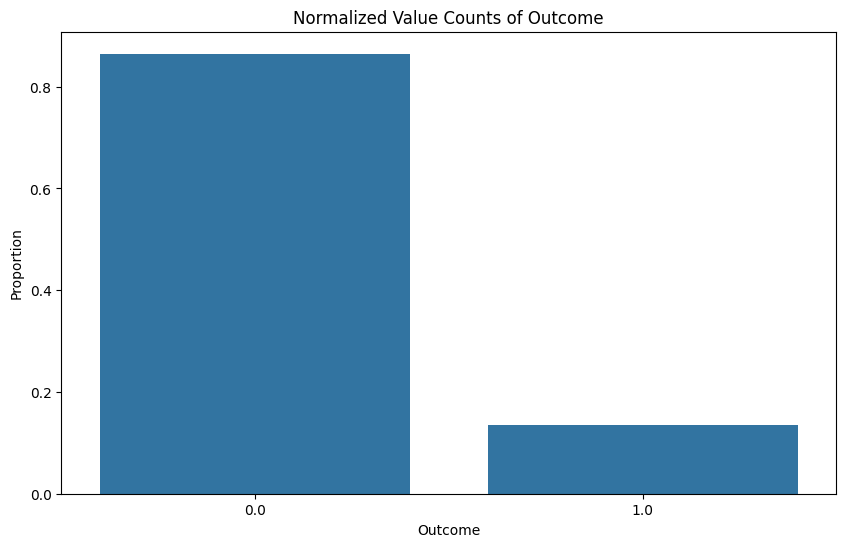

In [131]:
normalized_counts = df["outcome"].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_counts.index, y=normalized_counts.values)
plt.title('Normalized Value Counts of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.show()

In [132]:
df_features = df.drop(columns=['outcome'])

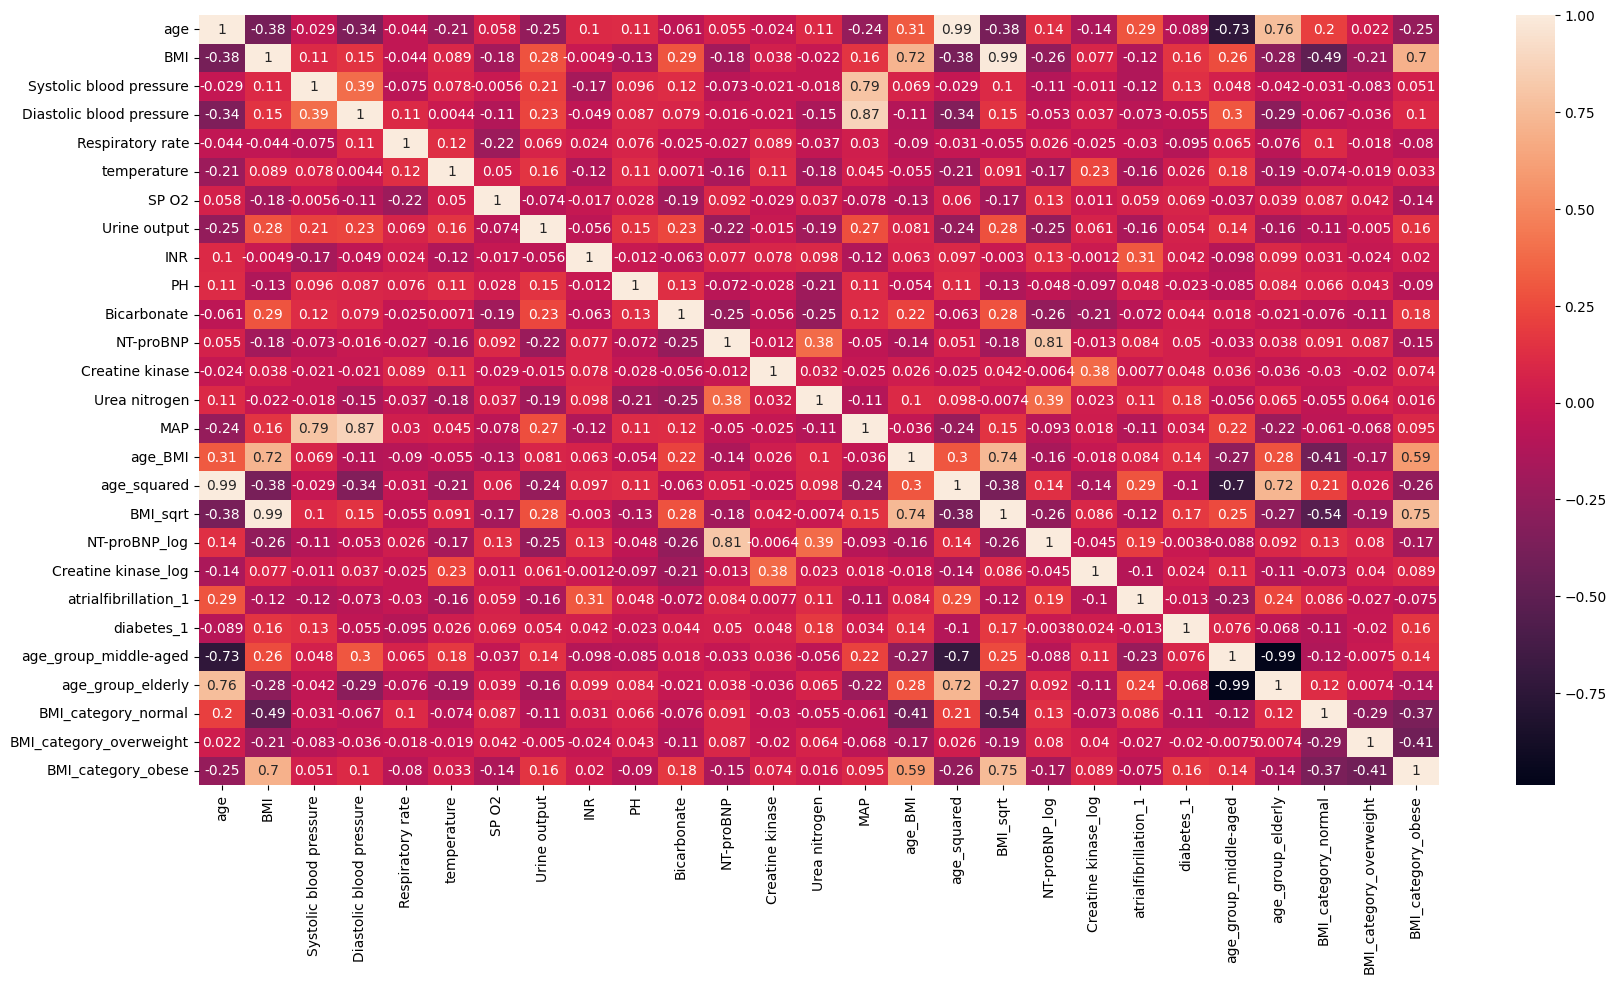

In [133]:
# plot the heatmap to check for Multicollinearity
plt.figure(figsize=(20, 10))  
sns.heatmap(df_features.corr(), annot=True)
plt.show()

[creatine and urea nitrogen], [bicarbonate and anion gap], [INR and PT], [Creatinine and anion gap] , [urea and anion gap], [Pco2 and bicarbonate] have a strong positive correlation, i would have to drop one of them.
i am only doing this for columns with > 0.5 correlation coefficient

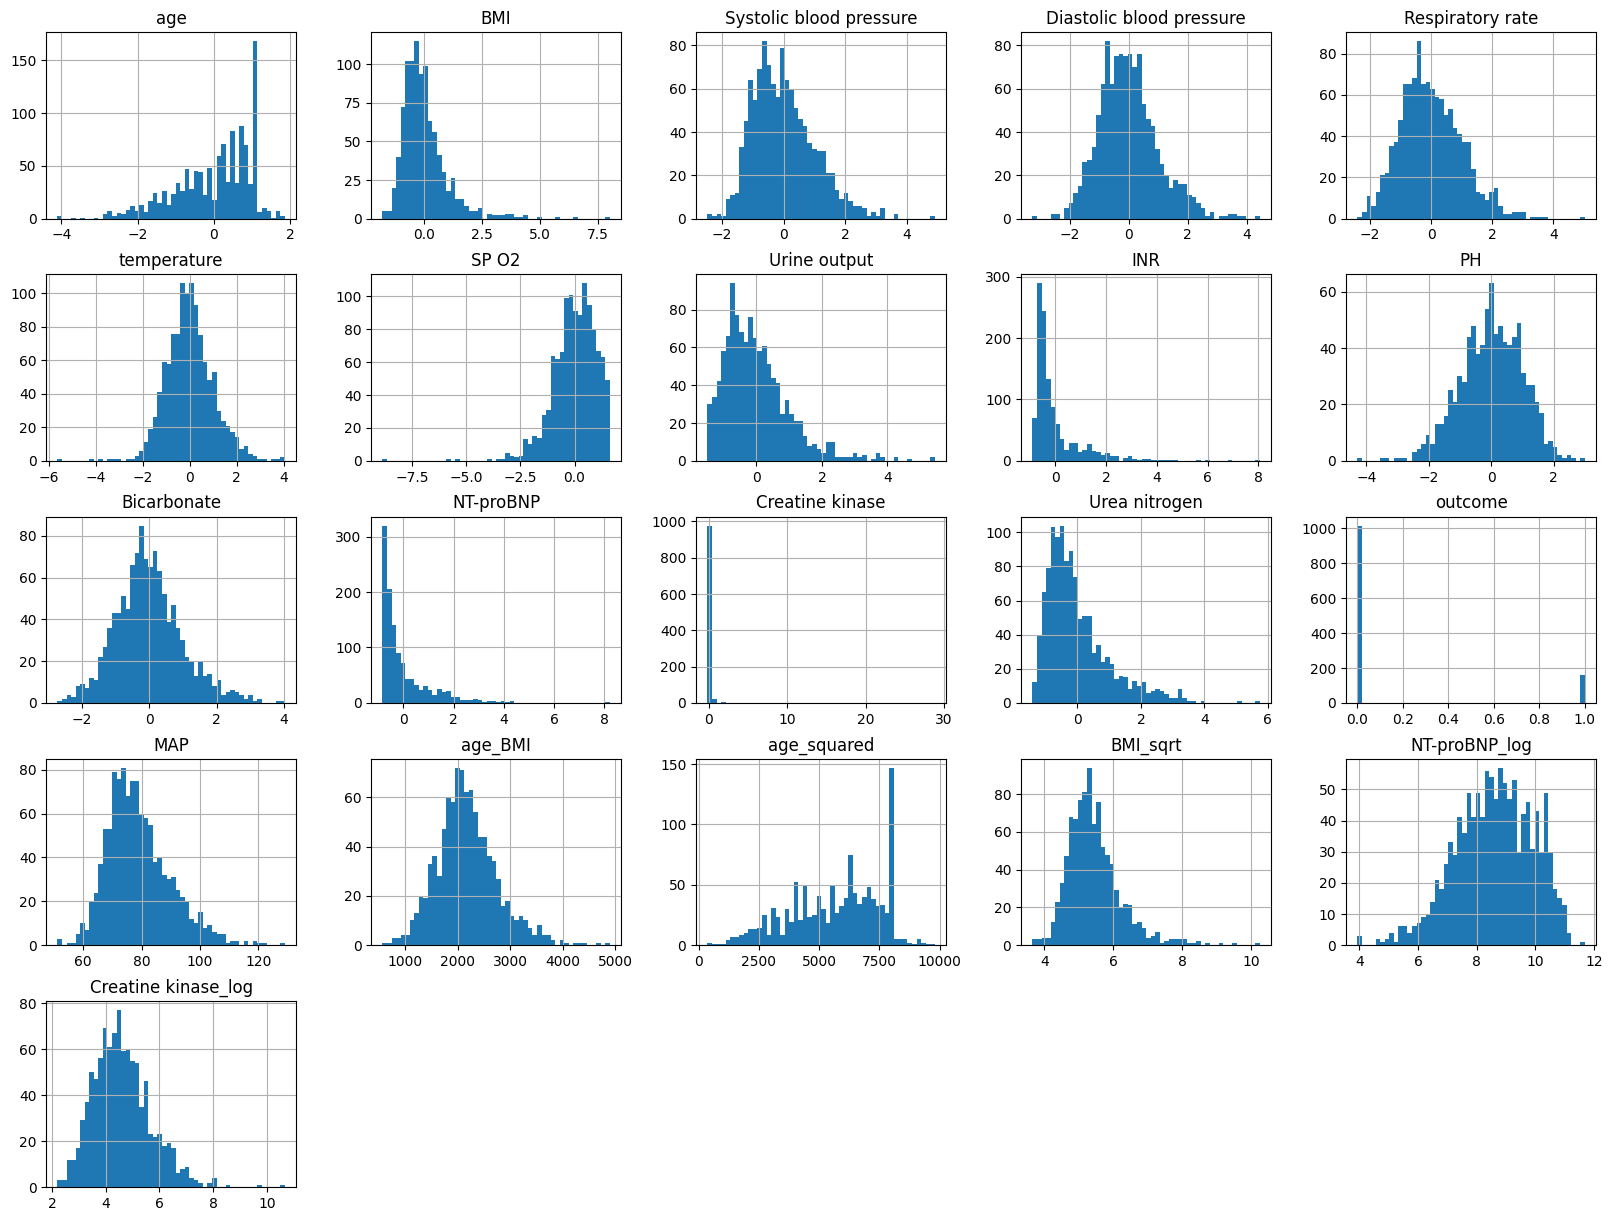

In [134]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [135]:
target_correlation = df.corr()

target_correlation["outcome"].sort_values(ascending=False)

outcome                     1.000000
Urea nitrogen               0.203024
INR                         0.144444
NT-proBNP                   0.121075
Respiratory rate            0.117015
NT-proBNP_log               0.115340
atrialfibrillation_1        0.100975
Creatine kinase             0.076656
age_squared                 0.068981
age                         0.064510
age_group_elderly           0.032525
Creatine kinase_log         0.014424
BMI_category_overweight     0.008752
BMI_category_normal        -0.005249
age_BMI                    -0.019846
age_group_middle-aged      -0.035927
diabetes_1                 -0.049997
BMI                        -0.062086
BMI_sqrt                   -0.069166
SP O2                      -0.071189
Diastolic blood pressure   -0.087403
temperature                -0.092861
BMI_category_obese         -0.096868
MAP                        -0.128978
Systolic blood pressure    -0.132857
PH                         -0.150611
Urine output               -0.173135
B

#### Now that we have the processed data let save the model and move to the next notebook to start building the model

In [136]:
#df.to_csv('../data/processed_data.csv', index=False)